In [109]:
#PR-78 EoS for vapour pressure and saturated liquid volume calculation of a single substance''
#the present code uses the widely known Equation of State from Peng and Robinson in order to calculate the vapour pressure
#and the respective saturated liquid volume for a given temperature. Creating and then importing here a data.csv file
#is required for the code to implement the proper calculations.The data.csv file should include the critical pressure(bar),
#critical temperarature(K) as well as the accentric factor(w) of the pure substance. The code is meant to run  more 
#than one datapoint. Inputs (within the data file) for each point are the following:temperature(K),
##pressure(expected or experimental value(bar)),saturated liquid volume(experimental or expected(cubic cm^3)). 
##The code below calculates the values of pressure and liquid volume for 
#each data point at the given temperature.Absolute deviations(%) between experimental (or expected) and calculated values of
#the aforementioned properties are presented,too. Finally, the performance of PR is assessed visually by creating the 
#corresponding plots.
#!!!After creating the proper data.csv file run the cells below consecutively.
##w=accentric factor
##Tc=Critical Temperature (K)
## Pc=Critical Pressure (bar)
## T(K)
## P(bar) ''Vapour Pressure''
## vl=molar volume(cubic cm^3/mol)

In [171]:
#importing data as csv type
import pandas as pd
data=pd.read_csv('data.csv')

In [172]:
#importing libraries
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [173]:
#Extracting initial data from the data file
R=8.314472*0.00001
Pc=data.at[0,'Pc']
Tc=data.at[0,'Tc']
w=data.at[0,'w']
P=data['P']
T=data['T']
Tr=T/Tc
data['Tr']=Tr
data['Pcal']=P
data['vlcal']=data['vlexp']
data

,P,T,vlexp,Tc,Pc,w,Tr,Pcal,vlcal
0,0.3317,193.15,34.7,373.4,89.63,0.09,0.517274,0.3317,34.7
1,0.4508,198.15,35.0,NaN,NaN,NaN,0.530664,0.4508,35.0
2,0.6024,203.15,35.3,NaN,NaN,NaN,0.544055,0.6024,35.3
3,0.7923,208.15,35.6,NaN,NaN,NaN,0.557445,0.7923,35.6
4,1.0130,212.88,35.9,NaN,NaN,NaN,0.570112,1.0130,35.9
5,1.0181,212.97,35.9,NaN,NaN,NaN,0.570354,1.0181,35.9
6,1.0272,213.15,35.9,NaN,NaN,NaN,0.570836,1.0272,35.9
7,1.3141,218.15,36.3,NaN,NaN,NaN,0.584226,1.3141,36.3
8,2.0742,228.15,37.0,NaN,NaN,NaN,0.611007,2.0742,37.0
9,3.1382,238.15,37.7,NaN,NaN,NaN,0.637788,3.1382,37.7


In [174]:
#Prediction algorithm
R=8.314472*10**(-5)
ac=(1/Pc)*0.45724*(R*R)*(Tc*Tc)
b=(0.0778*R*Tc)/Pc
if w<=0.491:
    m=0.37464+1.54226*w-0.26992*w*w
else:
    m=0.379642+1.48503*w-0.164423*w*w+0.016666*w*w*w
for i in range (0,len(data)):
    α=((1+m*(1-math.sqrt(Tr[i])))**2)
    e=1
    Pcal=P[i]
    while e>10**(-5):
        ##Solving 3-root Zequation
        A=(α*ac*Pcal)/(R*R*T[i]**2)
        B=(b*Pcal)/(R*T[i])
        Z0=1
        Z1=B-1
        Z2=A-2*B-3*(B*B)
        Z3=(B**3)+(B**2)-A*B
        Z=np.array([Z0,Z1,Z2,Z3])
        Z=np.roots(Z)
        ZV=np.max(Z)
        ZL=np.min(Z)
        #fugacities
        LNfL=ZL-1 - math.log(ZL-B)-(A/(2*B*math.sqrt(2)))*math.log((ZL+B*(1+math.sqrt(2)))/(ZL+B*(1-math.sqrt(2))))
        LNfV=ZV-1 - math.log(ZV-B)-(A/(2*B*math.sqrt(2)))*math.log((ZV+B*(1+math.sqrt(2)))/(ZV+B*(1-math.sqrt(2))))
        e=np.abs(math.exp(LNfL)-math.exp(LNfV))
        Pcal=Pcal*math.exp(LNfL)/math.exp(LNfV)
    data['Pcal'][i]=Pcal
    data['vlcal'][i]=(10**6)*(R*ZL*T[i])/Pcal
data['ADP%']= 100*(np.abs(data.P-data.Pcal))/data.P
data['ADvl%']=100*(np.abs(data.vlcal-data.vlexp))/data.vlexp


In [175]:
data

,P,T,vlexp,Tc,Pc,w,Tr,Pcal,vlcal,ADP%,ADvl%
0,0.3317,193.15,34.7,373.4,89.63,0.09,0.517274,0.364746,31.998542,9.962557,7.785182
1,0.4508,198.15,35.0,NaN,NaN,NaN,0.530664,0.490491,32.248669,8.804657,7.860945
2,0.6024,203.15,35.3,NaN,NaN,NaN,0.544055,0.649117,32.509605,7.755166,7.904802
3,0.7923,208.15,35.6,NaN,NaN,NaN,0.557445,0.846469,32.782342,6.836893,7.914768
4,1.0130,212.88,35.9,NaN,NaN,NaN,0.570112,1.074548,33.051958,6.075772,7.933263
5,1.0181,212.97,35.9,NaN,NaN,NaN,0.570354,1.079316,33.057203,6.012725,7.918654
6,1.0272,213.15,35.9,NaN,NaN,NaN,0.570836,1.088902,33.067705,6.006791,7.889401
7,1.3141,218.15,36.3,NaN,NaN,NaN,0.584226,1.383261,33.366598,5.263008,8.080997
8,2.0742,228.15,37.0,NaN,NaN,NaN,0.611007,2.157439,34.009074,4.013072,8.083585
9,3.1382,238.15,37.7,NaN,NaN,NaN,0.637788,3.232589,34.719116,3.007729,7.906853


In [176]:
data

,P,T,vlexp,Tc,Pc,w,Tr,Pcal,vlcal,ADP%,ADvl%
0,0.3317,193.15,34.7,373.4,89.63,0.09,0.517274,0.364746,31.998542,9.962557,7.785182
1,0.4508,198.15,35.0,NaN,NaN,NaN,0.530664,0.490491,32.248669,8.804657,7.860945
2,0.6024,203.15,35.3,NaN,NaN,NaN,0.544055,0.649117,32.509605,7.755166,7.904802
3,0.7923,208.15,35.6,NaN,NaN,NaN,0.557445,0.846469,32.782342,6.836893,7.914768
4,1.0130,212.88,35.9,NaN,NaN,NaN,0.570112,1.074548,33.051958,6.075772,7.933263
5,1.0181,212.97,35.9,NaN,NaN,NaN,0.570354,1.079316,33.057203,6.012725,7.918654
6,1.0272,213.15,35.9,NaN,NaN,NaN,0.570836,1.088902,33.067705,6.006791,7.889401
7,1.3141,218.15,36.3,NaN,NaN,NaN,0.584226,1.383261,33.366598,5.263008,8.080997
8,2.0742,228.15,37.0,NaN,NaN,NaN,0.611007,2.157439,34.009074,4.013072,8.083585
9,3.1382,238.15,37.7,NaN,NaN,NaN,0.637788,3.232589,34.719116,3.007729,7.906853


In [177]:
#Average absolute deviation in vapour pressure calculation
print ("AADP%=",np.average(data['ADP%']))
#Average absolute deviation in saturated liquid volumes
print ("AADvl%=",np.average(data['ADvl%']))

AADP%= 3.9698123143049964
AADvl%= 7.2100013775314835


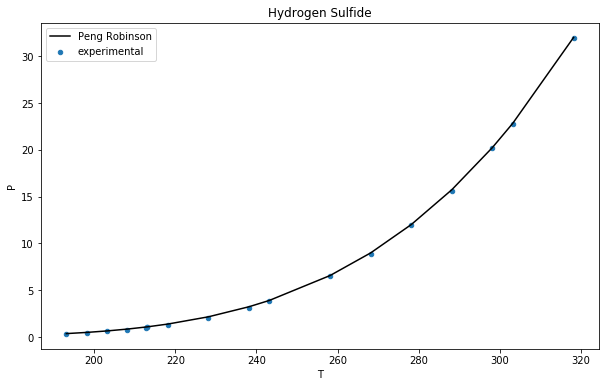

In [178]:
#Plotting experimental vs predicted(PR) vapour pressures
ax=plt.gca()
data.plot(kind='scatter',x='T',y='P',ax=ax,figsize=[10,6])
data.plot(kind='line',x='T',y='Pcal',ax=ax,color='black')
plt.legend(['Peng Robinson','experimental'])
plt.title('Hydrogen Sulfide')
plt.show()

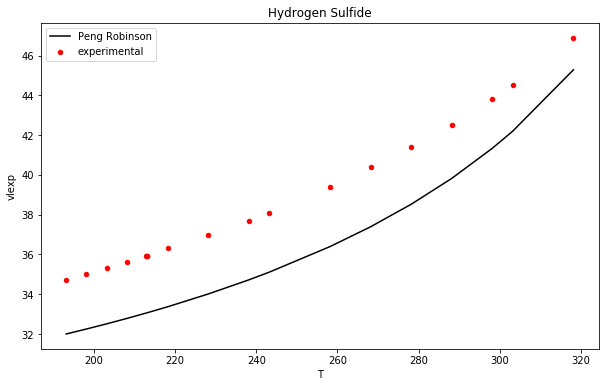

In [179]:
#Plotting experimental vs predicted(PR) saturated liquid volumes
ax=plt.gca()
data.plot(kind='scatter',x='T',y='vlexp',ax=ax,color='red',figsize=[10,6])
data.plot(kind='line',x='T',y='vlcal',ax=ax,color='black')
plt.legend(['Peng Robinson','experimental'])
plt.title('Hydrogen Sulfide')
plt.show()

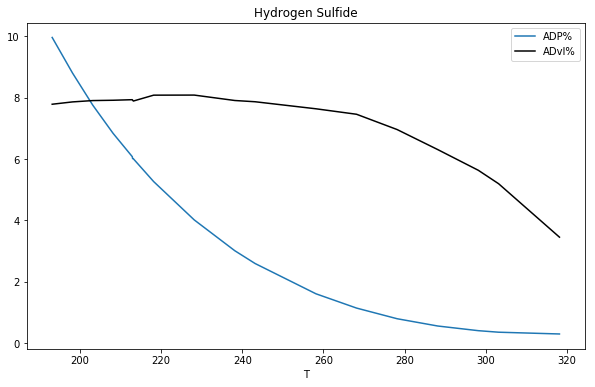

In [192]:
#
ax=plt.gca()
data.plot(kind='line',x='T',y='ADP%',ax=ax,figsize=[10,6])
data.plot(kind='line',x='T',y='ADvl%',ax=ax,color='black')
plt.legend(['ADP%','ADvl%'])
plt.title('Hydrogen Sulfide')
plt.show()